In [215]:
import statsmodels.stats.api as sms # İstatistik Kütüphanesi
import os # Operating system kütüphanesi, çalıştığımız directory'yi değiştiririz
import pandas as pd # Dataframe adında python'un özel tablo kütüphanesi
import seaborn as sns
from sklearn import datasets #Sckit-Learning kütüphanesindeki hazır 'toy' datasetler
import matplotlib.pyplot as plt # Plot etmek için bu şekilde çağırıyoruz
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro

In [216]:
df= pd.read_excel("data.xlsx")

In [217]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 134 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(1)
memory usage: 6.3+ MB


In [236]:
df.shape  # data 6167 gözlem ,136 değişken içermektedir.

(6167, 134)

In [243]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [244]:
df.isnull().values.any()

False

In [245]:
col=df.columns

num_cols=df._get_numeric_data().columns
cat=set(col)-set(num_cols)
cat

{'ind_109'}

In [246]:
df['ind_109'].unique()  #Bu değişkenin kategorik olduğu kanıtlandı.

array(['GREEN', 'RED'], dtype=object)

In [247]:
df["ind_109"].value_counts()

GREEN    3132
RED      3035
Name: ind_109, dtype: int64

In [242]:
cat = df.select_dtypes(include='object')
cat  #ind_109 değişkeni kategorik bir değişkendir.

,ind_109
0,GREEN
1,GREEN
2,GREEN
3,GREEN
4,GREEN
...,...
6162,RED
6163,RED
6164,GREEN
6165,GREEN


In [228]:
df = df.drop(["ind_420", "ind_422"], axis=1)  #bu verileri veri setimizden siliyoruz.
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [18]:
dummy_df = pd.get_dummies(df)
data = dummy_df
data

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483,1,0
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-28.2,-40,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088,0,1
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-28.6,-41,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318,0,1
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-37.2,-49,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755,1,0
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-48.9,-61,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723,1,0


In [19]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [249]:
df[['20_target','50_target','90_target']].describe().T

,count,mean,std,min,25%,50%,75%,max
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694
90_target,6167.0,-3.315072,36.841541,-38.573858,-37.695273,-35.788391,37.521892,38.465649


In [252]:
df_corr(['20_target','50_target','90_target']).T

NameError: name 'df_corr' is not defined

In [51]:
df = df.drop(columns=['20_target', '90_target'])

In [26]:
cor = df.corr()["50_target"].abs()
cor

ind_5        0.068989
ind_6        0.069652
ind_8        0.006984
ind_9        0.004053
ind_10       0.006654
               ...   
ind_418      0.101488
ind_424      0.003372
ind_426      0.009063
ind_428      0.052418
50_target    1.000000
Name: 50_target, Length: 131, dtype: float64

In [27]:
corr = cor.nlargest(6).index
corr

Index(['50_target', 'ind_412', 'ind_18', 'ind_17', 'ind_324', 'ind_332'], dtype='object')

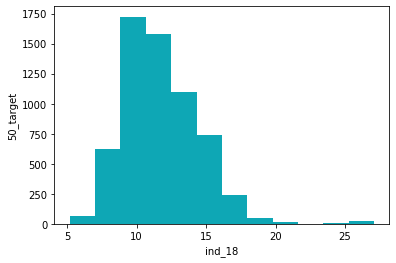

In [28]:
plt.hist(df.ind_18,bins=12,color='#0ea7b5',
         histtype="bar")

plt.xlabel("ind_18")
plt.ylabel("50_target")

plt.show()

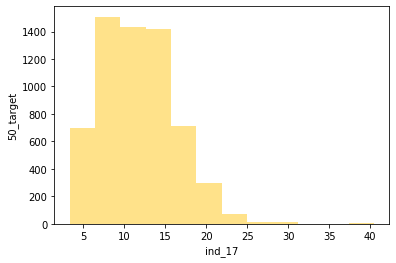

In [29]:
plt.hist(df.ind_17,bins=12,color='#ffe28a',
         histtype="bar")

plt.xlabel("ind_17")
plt.ylabel("50_target")

plt.show()

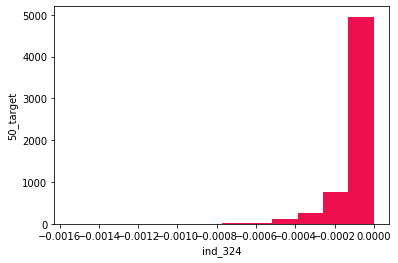

In [30]:
plt.hist(df.ind_324,bins=12,color='#ee104e',
         histtype="bar")

plt.xlabel("ind_324")
plt.ylabel("50_target")

plt.show()

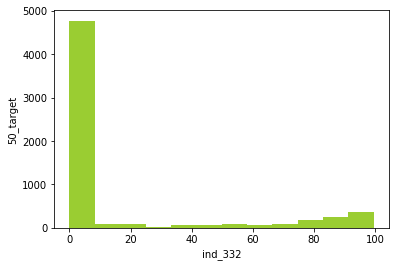

In [31]:
plt.hist(df.ind_332,bins=12,color='#9acd32',
         histtype="bar")

plt.xlabel("ind_332")
plt.ylabel("50_target")

plt.show()


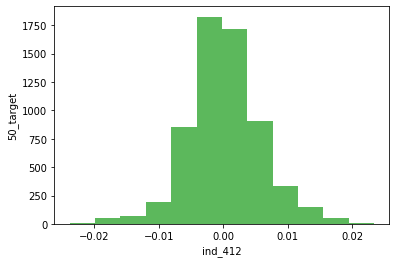

In [32]:
plt.hist(df.ind_412,bins=12,color='#5cb85c',
         histtype="bar")

plt.xlabel("ind_412")
plt.ylabel("50_target")

plt.show()

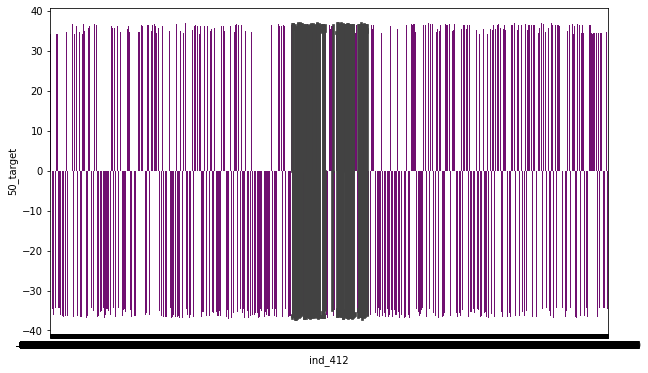

In [33]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.barplot(x="ind_412", y="50_target", data=df, ax=ax ,color ="purple")


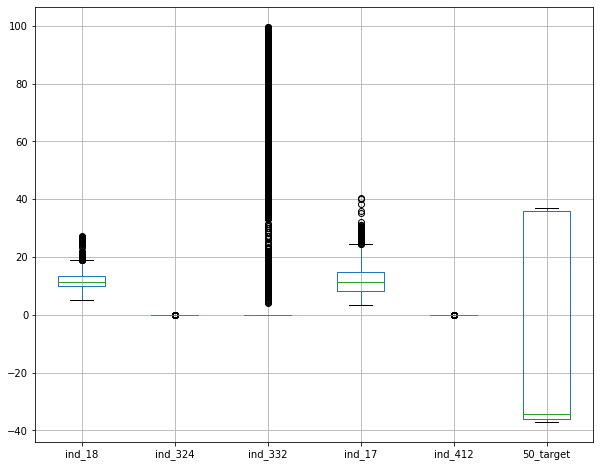

In [34]:
plt.figure(figsize=(10,8))
boxplot_df = df[["ind_18", "ind_324" , "ind_332","ind_17" , "ind_412" ,"50_target"]]
boxplot_df.boxplot()
plt.show()

In [35]:
new_data = df[['50_target', 'ind_412', 'ind_18', 'ind_17', 'ind_324', 'ind_332']]
new_data.corr()

,50_target,ind_412,ind_18,ind_17,ind_324,ind_332
50_target,1.000000,0.127234,0.127057,0.121097,-0.110802,0.104057
ind_412,0.127234,1.000000,-0.018460,-0.036754,-0.263317,0.077782
ind_18,0.127057,-0.018460,1.000000,0.545873,-0.257567,0.160939
ind_17,0.121097,-0.036754,0.545873,1.000000,-0.158633,0.064045
ind_324,-0.110802,-0.263317,-0.257567,-0.158633,1.000000,-0.137205
ind_332,0.104057,0.077782,0.160939,0.064045,-0.137205,1.000000


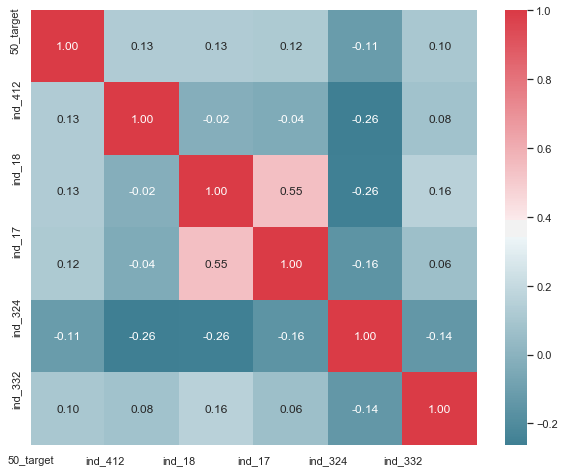

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = new_data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

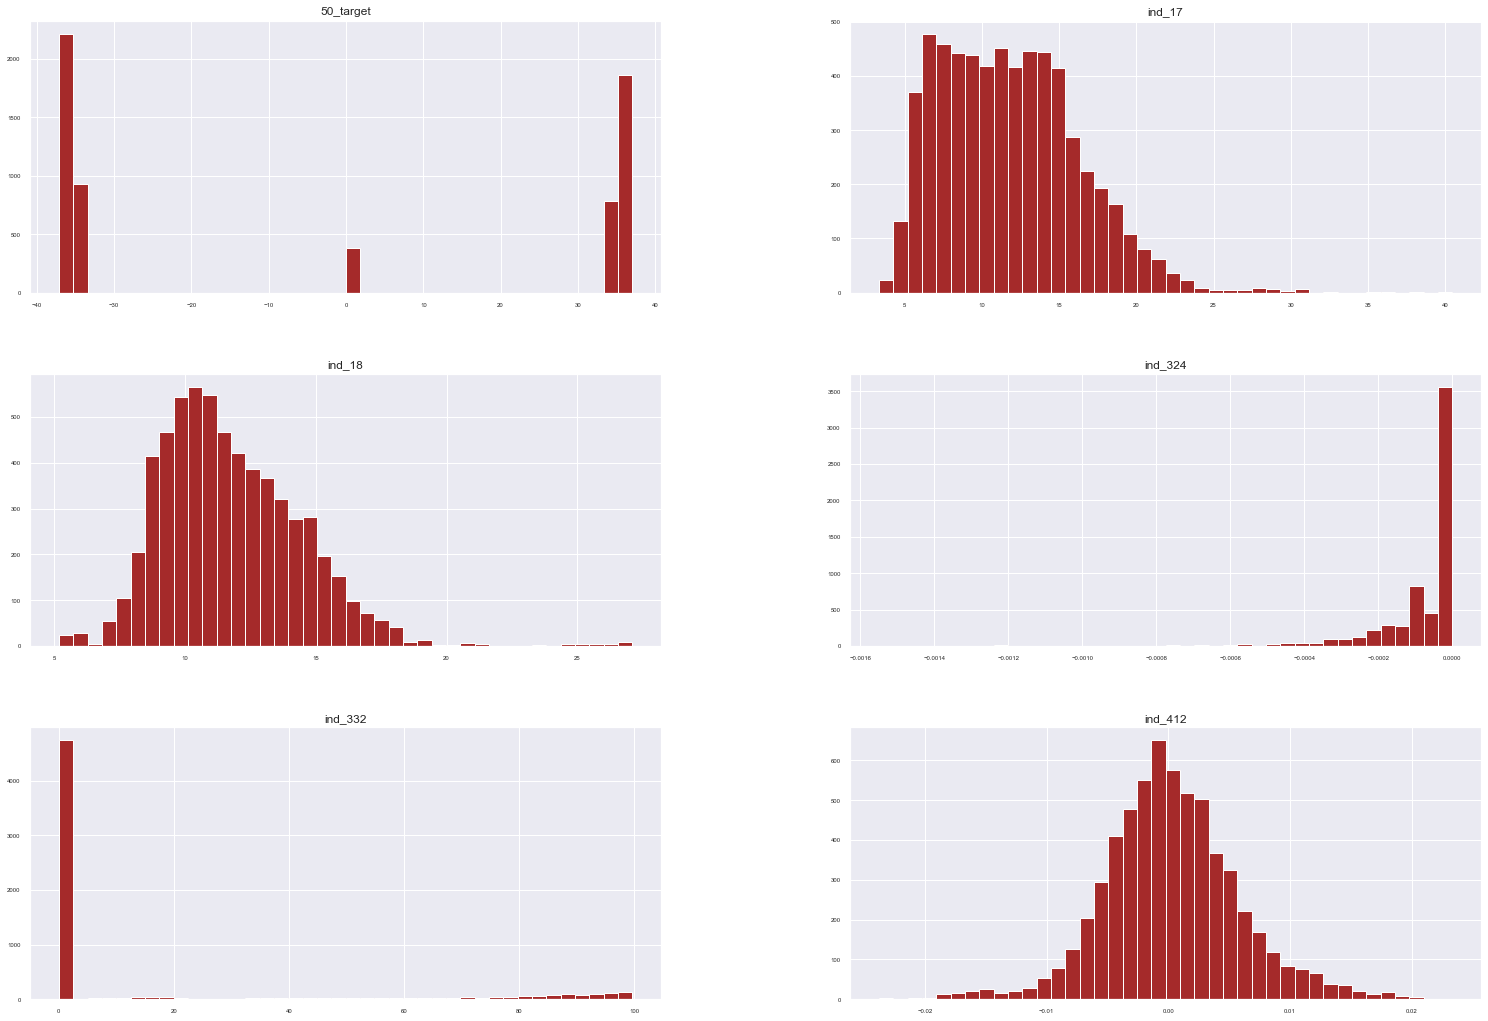

In [139]:
new_data.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6,color="brown")
plt.show()

In [ ]:
# Dağılımlara bakarak ind_412 değişkeninin normalliğinden şüphelendik ve shapiro normallik testi yaptık.

In [ ]:
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as stats
import pylab 
from scipy.stats import shapiro

In [174]:
stat, p = stats.shapiro(df["ind_412"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.985, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [181]:
stat, p = stats.shapiro(df["50_target"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.692, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [180]:
stats.levene(df["50_target"], df["ind_412"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")


Statistics:0.985, p=0.000 
İki değişkenin varyansı birbirine eşit değildir. (reject H0)


In [182]:
#Ortalamalar arasında anlamlı bir fark olup olmadığına baktık.
stats.ttest_ind(df['50_target'],df['ind_412'],equal_var=True) 

#H0 : İki değişkenin ortalamaları arasında anlamlı bir fark vardır.(Fail to reject)
#H1 : İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.(Reject)

Ttest_indResult(statistic=-6.604632042359823, pvalue=4.148655478019836e-11)

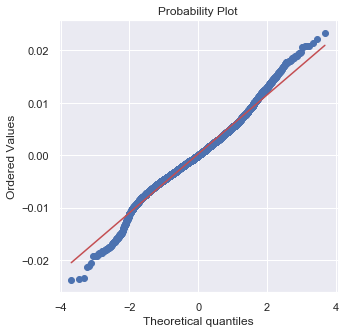

In [175]:
stats.probplot(new_data["ind_412"], dist = "norm", plot=pylab)
pylab.show()

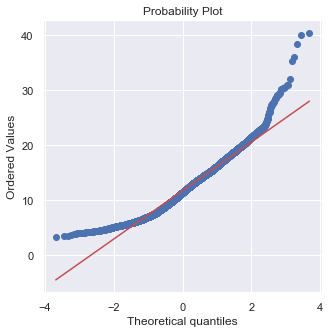

In [176]:
stats.probplot(new_data["ind_17"], dist = "norm", plot=pylab)
pylab.show()

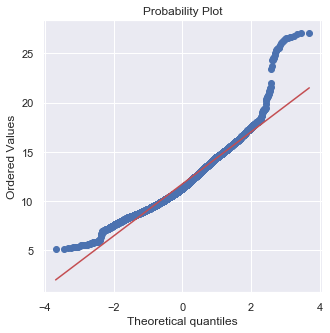

In [177]:
stats.probplot(new_data["ind_18"], dist = "norm", plot=pylab)
pylab.show()

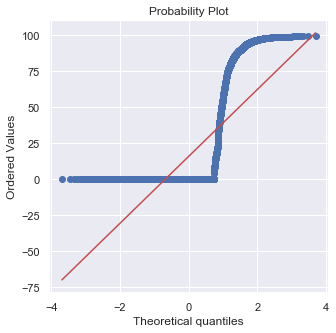

In [178]:
stats.probplot(new_data["ind_332"], dist = "norm", plot=pylab)
pylab.show()

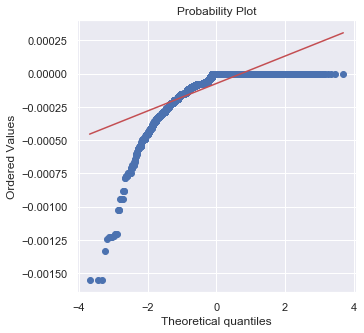

In [179]:
stats.probplot(new_data["ind_324"], dist = "norm", plot=pylab)
pylab.show()

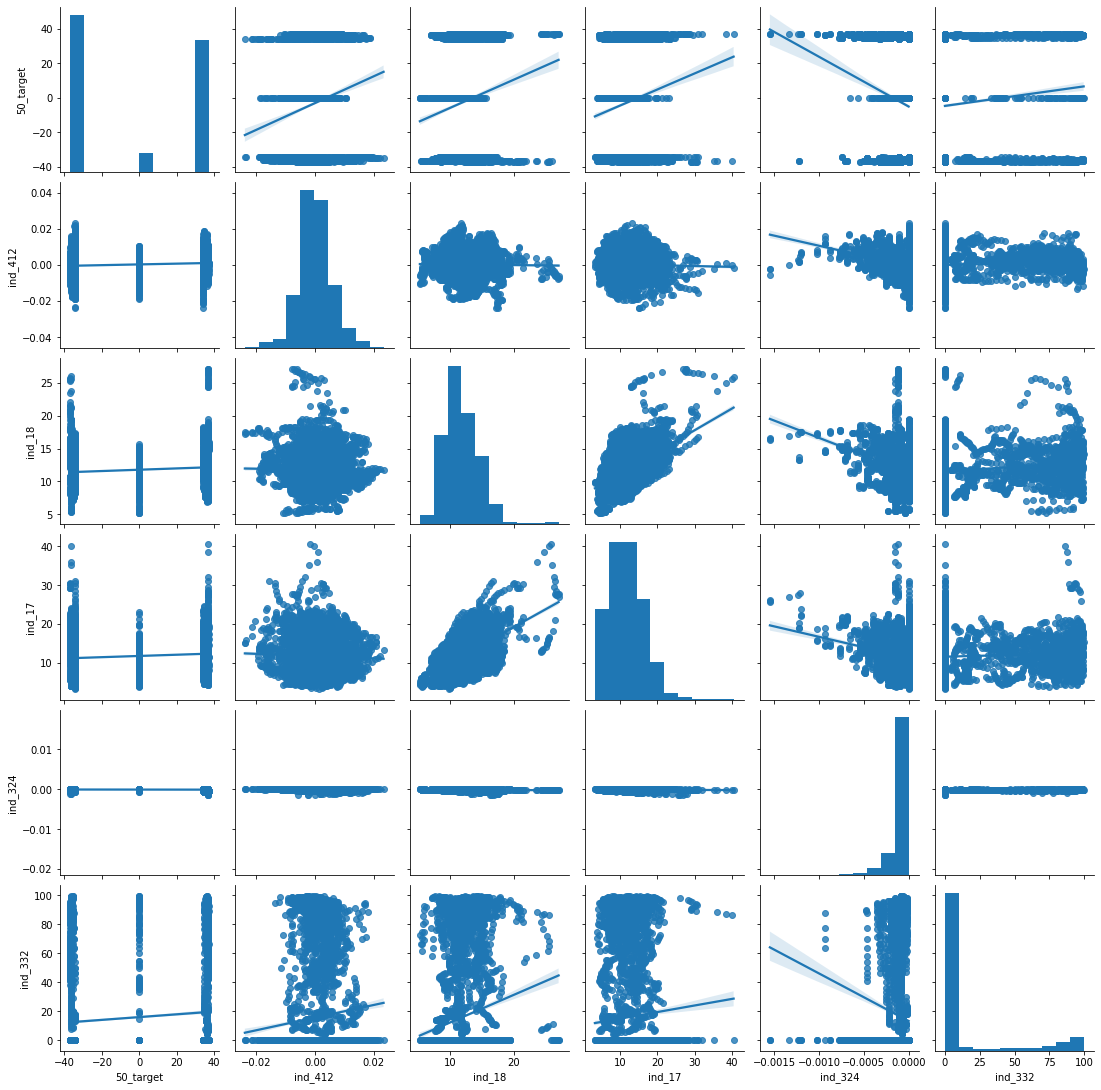

In [212]:
sns.pairplot(new_data,kind="reg")

# Linear Regression 

In [37]:
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as stats
import pylab 
from scipy.stats import shapiro

In [38]:
df= pd.read_excel("data.xlsx")

In [79]:
X= df[["ind_412","ind_18","ind_17","ind_324","ind_332"]]    # bağımlı değişken
X[0:5]

,ind_412,ind_18,ind_17,ind_324,ind_332
0,0.002371,9.1100,12.060000,-0.000062,20.967742
1,0.003074,9.2225,11.326667,-0.000062,20.800000
2,0.003561,9.3125,10.973333,-0.000062,20.634921
3,0.004366,9.4150,10.426667,-0.000062,20.472441
4,0.004198,9.8925,11.406667,-0.000062,20.312500


In [80]:
X=sm.add_constant(X)

In [81]:
y=df[["50_target"]]  # response variable
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [82]:
lm=sm.OLS(y,X)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     57.46
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           1.29e-58
Time:                        02:15:42   Log-Likelihood:                -30457.
No. Observations:                6167   AIC:                         6.093e+04
Df Residuals:                    6161   BIC:                         6.097e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.8114      1.944    -11.219      0.000     -25.623     -18.000
ind_412      699.7887     79.345      8.820      0.000     544.244     855.333
ind_18         0.8057      0.196      4.113      0.000       0.422       1.190
ind_17         0.6121      0.115      5.341      0.000       0.387       0.837
ind_324    -1.079e+04   3495.370     -3.087      0.002   -1.76e+04   -3938.578
ind_332        0.0807      0.014      5.838      0.000       0.054       0.108
==============================================================================
Omnibus:                    26013.709   Durbin-Watson:                   0.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              791.957
Skew:                           0.131   Prob(JB):                    1.07e-172
Kurtosis:                       1.264   Cond. No.                     2.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-21.8114,1.944,-11.219,0.000,-25.623,-18.000
ind_412,699.7887,79.345,8.820,0.000,544.244,855.333
ind_18,0.8057,0.196,4.113,0.000,0.422,1.190
ind_17,0.6121,0.115,5.341,0.000,0.387,0.837
ind_324,-1.079e+04,3495.370,-3.087,0.002,-1.76e+04,-3938.578
ind_332,0.0807,0.014,5.838,0.000,0.054,0.108


In [85]:
model.f_pvalue


1.286510129123042e-58

In [90]:
model.conf_int()

,0,1
const,-25.622630,-18.000153
ind_412,544.243913,855.333476
ind_18,0.421687,1.189773
ind_17,0.387471,0.836780
ind_324,-17642.866701,-3938.577557
ind_332,0.053589,0.107770


In [92]:
model.fittedvalues[0:5]

0   -3.070923
1   -2.950783
2   -2.767111
3   -2.469080
4   -1.615032
dtype: float64

In [97]:
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [99]:
X['ind_412'][0:5]

0    0.002371
1    0.003074
2    0.003561
3    0.004366
4    0.004198
Name: ind_412, dtype: float64

In [100]:
y_predicted=[]
for i in range(len(y)):
    y_predicted.append(X['ind_412'][i]*float(model.params[1])+float(model.params[0]))

In [101]:
y_predicted[0:5]

[-20.151880956972875,
 -19.659959595406512,
 -19.319200989392296,
 -18.756020145029254,
 -18.87368681491367]

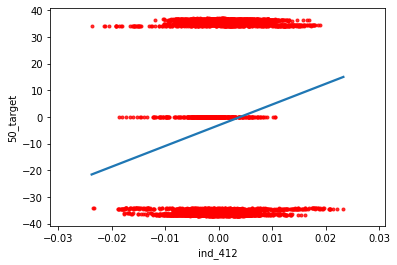

In [104]:
g = sns.regplot(df['ind_412'],df['50_target'], ci=None, scatter_kws={'color':'red','s':9})
g.set_ylabel('50_target')
g.set_xlabel('ind_412')
fig = g.get_figure()
fig.savefig("output.png")

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
X = df[['ind_412']]
y= df['50_target']


In [110]:
reg = LinearRegression()
model= reg.fit(X,y)

In [111]:
model.intercept_

-3.0802611305832257

In [112]:
model.coef_[0]

776.9121351827604

In [113]:
model.score(X,y)

0.016188589237305262

In [114]:
prediction=model.predict(X)
prediction[0:10]

array([-1.23785673, -0.69172091, -0.31340743,  0.31184136,  0.18120669,
        1.11100659,  1.38596356,  0.8907419 ,  0.13230473,  0.10143568])

In [115]:
error_df=prediction-y

In [116]:
error_arr=error_df.values

In [117]:
error_df.var()

1175.0429350508957

In [118]:
error_df.abs().mean()

33.103797261077915

In [135]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import numpy as np
import pandas as pd

In [136]:
k_t = pd.DataFrame({'gercek_y':y[0:10],'tahmin_y':reg.predict(X)[0:10]})

In [137]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,35.625252,-1.237857,36.863109
1,35.643013,-0.691721,36.334734
2,35.651301,-0.313407,35.964708
3,0.000000,0.311841,-0.311841
4,-35.727079,0.181207,-35.908286
5,-35.722047,1.111007,-36.833054
6,-35.720567,1.385964,-37.106531
7,-35.712575,0.890742,-36.603317
8,-35.693926,0.132305,-35.826231
9,-35.699550,0.101436,-35.800986


In [139]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,35.625252,-1.237857,36.863109,1358.888798
1,35.643013,-0.691721,36.334734,1320.212866
2,35.651301,-0.313407,35.964708,1293.460248
3,0.000000,0.311841,-0.311841,0.097245
4,-35.727079,0.181207,-35.908286,1289.404996
5,-35.722047,1.111007,-36.833054,1356.673840
6,-35.720567,1.385964,-37.106531,1376.894610
7,-35.712575,0.890742,-36.603317,1339.802790
8,-35.693926,0.132305,-35.826231,1283.518824
9,-35.699550,0.101436,-35.800986,1281.710603


In [140]:
np.sum(k_t["hata_kare"])

11900.664819668971

In [150]:
lm= sm.OLS(y,X) 
model = lm.fit()

In [151]:
influence = model.get_influence()
influence

In [152]:
import seaborn as sns

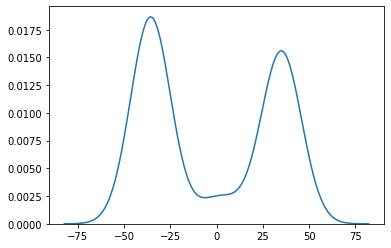

In [155]:
### Residual yani artık değerler için normalite testlerinin yapılması.
#Model residuallarından tahmin ettiklerimizi getirmesini istedik.
advres = pd.concat([df, pd.Series (model.resid, name= 'resid'), pd.Series (model.predict() , name= "predict")] ,axis=1)
sns.kdeplot (np.array (advres.resid), bw=10)


In [156]:
model.resid

0       33.833818
1       33.320552
2       32.960993
3       -3.298259
4      -38.898318
          ...    
6162   -38.036324
6163   -40.967215
6164   -41.247373
6165   -41.351345
6166   -41.144332
Length: 6167, dtype: float64

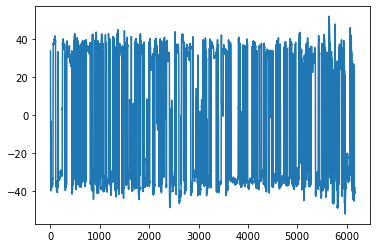

In [157]:
plt.plot(model.resid)

In [158]:
print (np.sum(k_t['hata_kare']))
print (np.mean(k_t['hata_kare']))
print (np.average(((k_t['hata']).abs())))
print (np.sqrt(np.mean(k_t['hata_kare'])))

11900.664819668971
1190.066481966897
32.75527959777645
34.49734021583254


# Çoklu Regresyon

In [202]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
ad = pd.read_excel("data.xlsx" )
df = ad.copy()

In [203]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
X = df.drop("20_target" , axis=1 )
y = df["50_target"]

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)

In [210]:
X = df.drop('20_target', axis=1)
y = df['50_target']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
training = df.copy()
print(training.shape)

(4933, 135)
(1234, 135)
(4933,)
(1234,)
(6167, 136)


In [204]:
X_train.shape

(4933, 135)

In [205]:
X_test.shape

(1234, 135)

In [206]:
y_train.shape

(4933,)

In [207]:
y_test.shape

(1234,)